<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


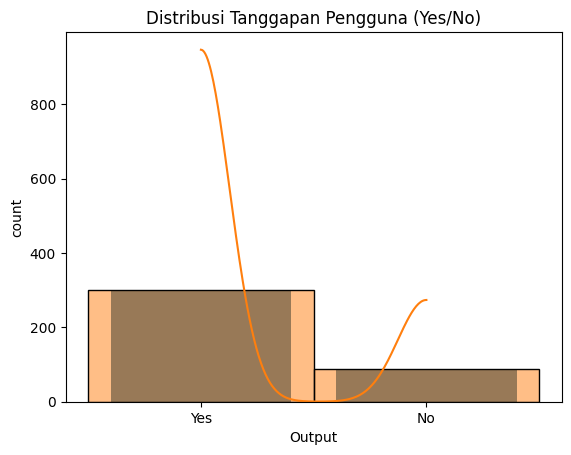


Hasil Standard Scaling:
        Age  Family size  latitude  longitude  Pin code
0 -1.557620     0.532929  0.102224  -0.016759 -1.247274
1 -0.211614    -0.208205  0.111227  -0.445712 -0.992164
2 -0.884617    -0.208205 -0.381663   1.153112 -0.737055
3 -0.884617     2.015198 -0.557212  -0.751828 -0.673278
4 -0.884617     0.532929  0.291278  -0.913660 -0.960276
Test accuracy: 0.8589743589743589


['model.sav']

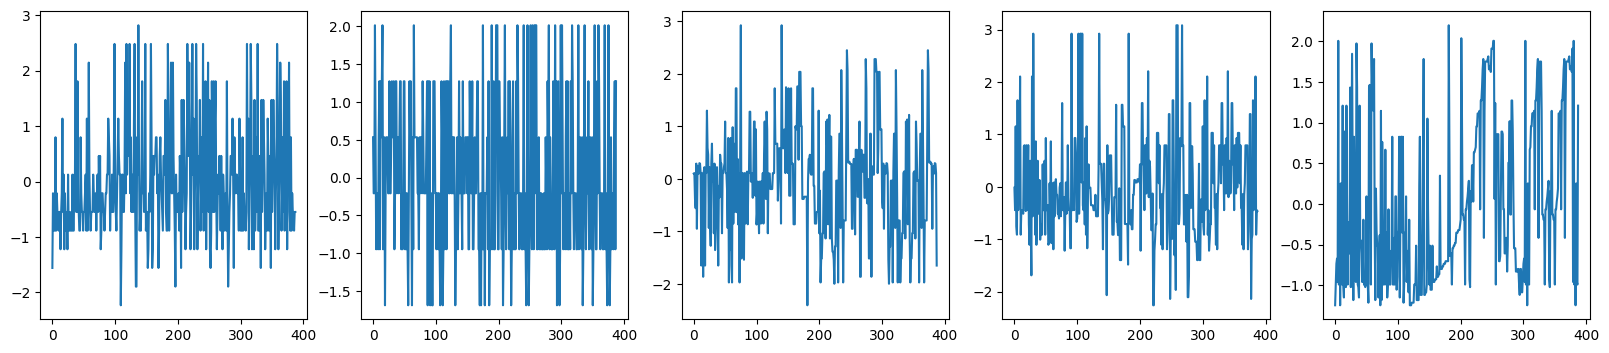

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

## INPUT DATA ##
onlinefoods = pd.read_csv('/content/onlinefoods.csv')

## EDA ##
# drop kolom #
onlinefoods = onlinefoods.drop(columns=['Unnamed: 12'])

# mengetahui bebarapa data baris pertama dan terakhir #
onlinefoods.head()
onlinefoods.info()

# mengetahui jumlah kategori yang ada di dalam kolom output #
output_counts = onlinefoods.Output.value_counts()
output_counts

# visualisasi #
# 1
plt.title('Yes vs No')
sns.countplot(x='Output', data=onlinefoods)
# 2
sns.histplot(onlinefoods['Output'], kde=True)
plt.title('Distribusi Tanggapan Pengguna (Yes/No)')
plt.show()

## cek nilai null ##
onlinefoods.isna().sum()

## Pengkodean variabel kategorikal ##
onlinefoods_new = onlinefoods.select_dtypes(include=['object']).copy()
nRows, nCols = onlinefoods_new.shape
for myIndex in range(0,nCols):
    headerName = onlinefoods_new.columns[myIndex]
    onlinefoods_new[headerName] = onlinefoods_new[headerName].astype("category")
    onlinefoods_new[headerName] = onlinefoods_new[headerName].cat.codes
    onlinefoods[headerName] = onlinefoods_new[headerName]
onlinefoods_numeric = onlinefoods
onlinefoods_numeric.head()

## Penskalaan fitur numerik ##
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Menampilkan kolom numerik
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

# Membuat salinan data untuk menjaga data asli tetap utuh
data_scaled = onlinefoods.copy()

# Standard Scaling
standard_scaler = StandardScaler()
data_scaled[numerical_features] = standard_scaler.fit_transform(onlinefoods[numerical_features])

# Menampilkan hasil Standard Scaling
print("\nHasil Standard Scaling:")
print(data_scaled[numerical_features].head())

# visualisasi
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,5,figsize=(20,4))
for x,y in enumerate(data_scaled[numerical_features]):
    axs[x].plot(data_scaled[numerical_features][y])

# Memisahkan fitur dan target
X = onlinefoods.drop(columns=['Output'])
y = onlinefoods['Output']


categorical_columns = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
                       'Educational Qualifications', 'Feedback']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    onlinefoods[column] = le.fit_transform(onlinefoods[column])
    label_encoders[column] = le

features = onlinefoods.drop(columns=['Output'])
target = LabelEncoder().fit_transform(onlinefoods['Output'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Test accuracy: {accuracy}')

joblib.dump(svm_model, 'model.sav')
